<a href="https://colab.research.google.com/github/sagawritescode/ERA-V1/blob/main/Assignment7Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Cuda

In [12]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


Transforms

In [13]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

Download Data

In [14]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Load test and train data using dataloader

In [15]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Plot the images

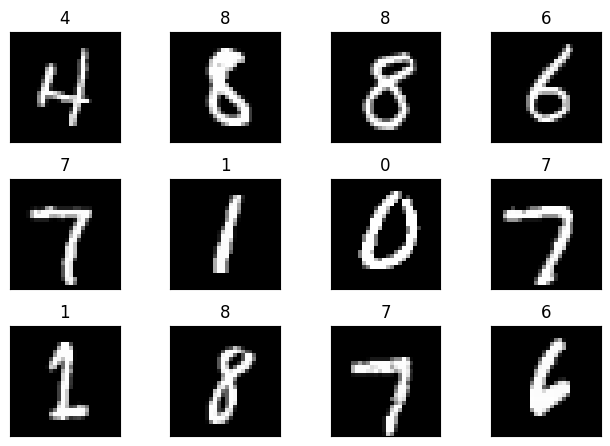

In [16]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

Initialising and summarising model

In [17]:
!pip install torchsummary
from torchsummary import summary
from model import Model3
from utils import train, test

training_model = Model3().to(device)
summary(training_model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             900
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 16, 22, 22]           1,440
              ReLU-6           [-1, 16, 22, 22]               0
            Conv2d-7           [-1, 10, 22, 22]             160
              ReLU-8           [-1, 10, 22, 22]               0
         MaxPool2d-9           [-1, 10, 11, 11]               0
           Conv2d-10             [-1, 10, 9, 9]             900
             ReLU-11             [-1, 10, 9, 9]               0
           Conv2d-12             [-1, 16, 7, 7]           1,440
    

In [18]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []


CODE BLOCK: 10

In [19]:
optimizer = optim.SGD(training_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(training_model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(training_model, device, test_loader, criterion, test_acc, test_losses)
  # train(training_model, device, train_loader, optimizer, epoch)
  # test(training_model, device, test_loader)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.3025 Batch_id=468 Accuracy=13.03: 100%|██████████| 469/469 [00:20<00:00, 22.48it/s]


Test set: Average loss: 2.3025, Accuracy: 1232/10000 (12.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.3022 Batch_id=468 Accuracy=11.67: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Test set: Average loss: 2.3023, Accuracy: 1150/10000 (11.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.2987 Batch_id=468 Accuracy=11.33: 100%|██████████| 469/469 [00:18<00:00, 25.07it/s]


Test set: Average loss: 2.3004, Accuracy: 1147/10000 (11.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2435 Batch_id=468 Accuracy=55.41: 100%|██████████| 469/469 [00:17<00:00, 27.15it/s]


Test set: Average loss: 0.2259, Accuracy: 9295/10000 (92.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0663 Batch_id=468 Accuracy=93.99: 100%|██████████| 469/469 [00:18<00:00, 25.77it/s]


Test set: Average loss: 0.1244, Accuracy: 9633/10000 (96.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1816 Batch_id=468 Accuracy=96.14: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]


Test set: Average loss: 0.0977, Accuracy: 9711/10000 (97.11%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.0650 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:17<00:00, 26.50it/s]


Test set: Average loss: 0.0773, Accuracy: 9763/10000 (97.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0187 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:17<00:00, 26.70it/s]


Test set: Average loss: 0.0755, Accuracy: 9768/10000 (97.68%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0470 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:17<00:00, 26.57it/s]


Test set: Average loss: 0.0749, Accuracy: 9765/10000 (97.65%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0339 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:17<00:00, 27.25it/s]


Test set: Average loss: 0.0728, Accuracy: 9772/10000 (97.72%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0805 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:16<00:00, 27.75it/s]


Test set: Average loss: 0.0713, Accuracy: 9769/10000 (97.69%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1422 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:16<00:00, 27.68it/s]


Test set: Average loss: 0.0699, Accuracy: 9787/10000 (97.87%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.1045 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:17<00:00, 27.42it/s]


Test set: Average loss: 0.0682, Accuracy: 9783/10000 (97.83%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.1314 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:16<00:00, 27.90it/s]


Test set: Average loss: 0.0685, Accuracy: 9786/10000 (97.86%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0704 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:17<00:00, 27.46it/s]


Test set: Average loss: 0.0684, Accuracy: 9779/10000 (97.79%)

Adjusting learning rate of group 0 to 1.0000e-04.


CODE BLOCK: 11

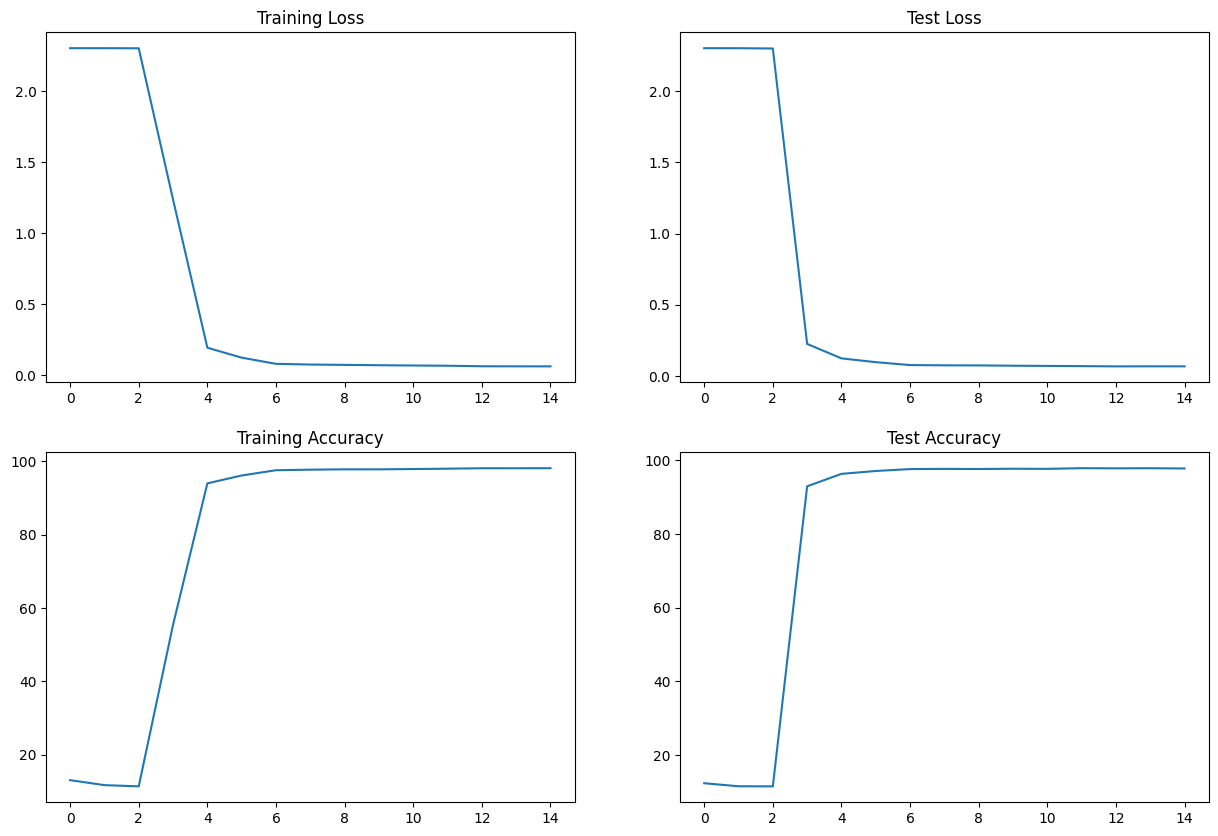

In [20]:
from utils import plot_loss_and_accuracy
plot_loss_and_accuracy(train_losses, train_acc, test_losses, test_acc)